# 前處理-資料清理
1. missing data
    - 平均值、標準差、屆在平均值與標準差之間的亂數
    
2. range差異過大的資料
    - 偵測(identity): PCA
    
    - 處理: 取log e.g. 10^1 => 1, 10^6 => 6
    
4. 資料不一致的問題
    - domain knowledge e.g. 年紀為負的
    
5. 正規化(Normalize)
    - L1 Norm(穩定: 水平調整較少): 
        - $\|𝑥\|_{1𝑖} = {𝑥_𝑖}{\sum{|𝑥_𝑖|}}$
    - L2 Norm(強健: 較能對抗outlier): 
        - $\|𝑥\|_{2𝑖}=\dfrac{𝑥_𝑖}{\sqrt{(\sum{𝑥_𝑖^2)}}}$

6. 類別型資料的處理
    - 自然語言(NLP): 先轉成類別型資料
    - onehot encoding
    
| 0 | 1 | 2 |
|---|---|---|
|[1,0,0]|[0,1,0]|[0,0,1]|

7. Feature 產生工具
    - PolynomialFeatures: (𝑋_1, 𝑋_2)=> (1, 𝑋_1, 𝑋_2, 𝑋_1^2, 𝑋_1 𝑋_2, 𝑋_2^2)
    
8. 議題:
    - 請問取log與normalize有什麼差別?


# IMPORT & DATA

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import os 
import random
import math

In [6]:
df = pd.read_csv('train.csv')

# 請查看df.info()
# 並找出共有幾種型別，以及哪一些欄位有null值
#=============your works starts===============#
# df_info = df.info()
df_isnull = df.isna().sum()
print(df_isnull)
#==============your works ends================#

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# 請查看df.describe()
# 請透過mean關注每一個變數的scale
#=============your works starts===============#
df_describe = df.describe()
#==============your works ends================#
df_describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#請透過head()查看df的頭5行
#=============your works starts===============#
numb = 3
df_head = df.head(numb)
#==============your works ends================#

df_head.unstack()

PassengerId  0                                                    1
             1                                                    2
             2                                                    3
Survived     0                                                    0
             1                                                    1
             2                                                    1
Pclass       0                                                    3
             1                                                    1
             2                                                    3
Name         0                              Braund, Mr. Owen Harris
             1    Cumings, Mrs. John Bradley (Florence Briggs Th...
             2                               Heikkinen, Miss. Laina
Sex          0                                                 male
             1                                               female
             2                                  

# PREPROCESSING

## Age - Fill in missing values

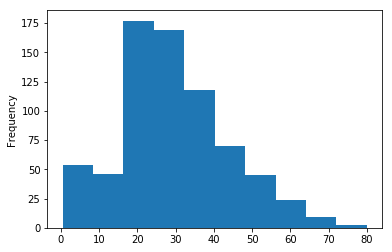

In [9]:
# 查看Age的分布狀況(hint: plot(), kind='hist')
#=============your works starts===============#
age_ax = df['Age'].plot('hist')
#==============your works ends================#

plt.show()

In [10]:
# 作法一: 取平均值
#=============your works starts===============#
avg_age = df['Age'].mean()
# avg_age.apply(lambda x:x'{0:2f}'.format(x))
print(type(avg_age))
#==============your works ends================#


print("avg_age", avg_age) 
# avg_age 29.69911764705882

<class 'numpy.float64'>
avg_age 29.69911764705882


In [11]:
# 作法二: 取中位數
#=============your works starts===============#
median_age = df['Age'].median()
#==============your works ends================#


print("median_age", median_age) 
# median_age 28.0

median_age 28.0


In [12]:
Age_null = (len(df[pd.isnull(df['Age'])]))
print(Age_null)

print(df['Age'].isna().sum())

177
177


In [13]:
df['Age'].isna().sum()

177

In [14]:
# 作法三: 用相同的分布產生亂數塞入(hint:使用np.random.randint, min: mean - std, max: mean + std)
std = df['Age'].std()
mean = df['Age'].mean()
size = len(df[pd.isnull(df['Age'])])


#=====決定隨機變數的種子=============
np.random.seed(1212)
#=============your works starts===============#

# random_age = np.random.randint(mean-std,mean+std,size)

random_age = np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),
                            df['Age'].isna().sum())

#==============your works ends================#


print("random_age", random_age) 
print("len(random_age)", len(random_age)) 
# random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27
# len(random_age) 177

random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27
 37 28 30 23 31 33 42 30 25 21 29 15 21 16 39 39 21 31 31 37 31 30 23 41
 30 35 33 21 31 28 39 37 31 29 29 40 16 43 20 29 36 22 27 41 32 24 35 23
 29 43 33 43 31 34 34 28 27 40 29 35 27 20 40 37 16 29 29 39 20 17 20 35
 24 42 34 33 26 38 42 31 30 40 34 16 35 16 34 24 43 29 22 29 20 43 29 38
 37 39 35 42 40 19 32 17 25 36 15 26 31 23 19 24 34 39 39 19 17 28 16 35
 20 16 29 18 34 43 16 28 30 42 27 25 36 19 22 43 37 38 30 15 32 38 41 21
 26 33 20 19 21 29 40 30 28]
len(random_age) 177


In [15]:
df['avg_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'avg_age'] = avg_age
df['median_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'median_age'] = median_age
df['random_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'random_age'] = random_age

df.loc[pd.isnull(df['Age']), ['avg_age', 'median_age', 'random_age']].head()

,avg_age,median_age,random_age
5,29.699118,28.0,23.0
17,29.699118,28.0,41.0
19,29.699118,28.0,37.0
26,29.699118,28.0,17.0
28,29.699118,28.0,31.0


## Age - Normalize
- L1 Normalization: $|| x ||_2 = \sqrt{\left(\sum_i x_i^2\right)} = \sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}$
- L2 Normalization: $|| x ||_1 = \sum_i |x_i| = |x_1| + |x_2| + \ldots + |x_i|$
- difference

![l1_l2_norm](./imgs/l1_l2_norm.png)

In [16]:
# 請寫出L2 Normaliaze的function
def normalize_l2(X):
    """if type(X) == np.array, and X has two dimensiions"""
    #=============your works starts===============#
#     l2_x = np.sum(np.abs(X))
    l2_x = (np.abs(X)).sum()
    X = X / l2_x
    #==============your works ends================#
    return X

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = normalize_l2(X)
print(X_normalized)
# [[ 0.125 -0.125  0.25 ]
#  [ 0.25   0.     0.   ]
#  [ 0.     0.125 -0.125]]

[[ 0.125 -0.125  0.25 ]
 [ 0.25   0.     0.   ]
 [ 0.     0.125 -0.125]]


In [17]:
# 請寫出L1 Normaliaze的function
def normalize_l1(X):
    """if type(X) == np.array, and X has two dimensiions"""
    #=============your works starts===============#
    l1_x = np.sqrt(np.sum(np.square(X)))
    X = X / l1_x
    #==============your works ends================#
    return X

X_normalized = normalize_l1(X)
print(X_normalized)
# [[ 0.28867513 -0.28867513  0.57735027]
#  [ 0.57735027  0.          0.        ]
#  [ 0.          0.28867513 -0.28867513]]

[[ 0.28867513 -0.28867513  0.57735027]
 [ 0.57735027  0.          0.        ]
 [ 0.          0.28867513 -0.28867513]]


In [18]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

# 請使用preprocessing.normalize(X, norm='l1')比較，與我們自己寫的normalize function有什麼不同
#=============your works starts===============#
X_normalized_self = normalize_l1(X)
X_normalized_sklearn = preprocessing.normalize(X,norm='l1',axis=1)
#==============your works ends================#

print('[All elem sum 1]: \n',X_normalized_self)
print('[one row sum 1]: \n',X_normalized_sklearn)
# sklearn l1_norm
# [[ 0.25 -0.25  0.5 ]
#  [ 1.    0.    0.  ]
#  [ 0.    0.5  -0.5 ]]


[All elem sum 1]: 
 [[ 0.28867513 -0.28867513  0.57735027]
 [ 0.57735027  0.          0.        ]
 [ 0.          0.28867513 -0.28867513]]
[one row sum 1]: 
 [[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]


In [19]:
avg_age_l1 = normalize_l1(df['avg_age'].values)
avg_age_l2 = normalize_l2(df['avg_age'].values)

df['avg_age_l1'] = avg_age_l1
df['avg_age_l2'] = avg_age_l2

df[['avg_age', 'avg_age_l1', 'avg_age_l2']].head()

,avg_age,avg_age_l1,avg_age_l2
0,22.0,0.022735,0.000831
1,38.0,0.039270,0.001436
2,26.0,0.026869,0.000983
3,35.0,0.036170,0.001323
4,35.0,0.036170,0.001323


## Cabin - NLP category

In [20]:
list(df['Cabin'])

[nan,
 'C85',
 nan,
 'C123',
 nan,
 nan,
 'E46',
 nan,
 nan,
 nan,
 'G6',
 'C103',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'D56',
 nan,
 'A6',
 nan,
 nan,
 nan,
 'C23 C25 C27',
 nan,
 nan,
 nan,
 'B78',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'D33',
 nan,
 'B30',
 'C52',
 nan,
 nan,
 nan,
 nan,
 nan,
 'B28',
 'C83',
 nan,
 nan,
 nan,
 'F33',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'F G73',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'C23 C25 C27',
 nan,
 nan,
 nan,
 'E31',
 nan,
 nan,
 nan,
 'A5',
 'D10 D12',
 nan,
 nan,
 nan,
 nan,
 'D26',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'C110',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'B58 B60',
 nan,
 nan,
 nan,
 nan,
 'E101',
 'D26',
 nan,
 nan,
 nan,
 'F E69',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'D47',
 'C123',
 nan,
 'B86',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'F2',
 nan,
 nan,
 'C2'

In [21]:

# 整理出每一個Cabin的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_cabin_counter = sorted(Counter(df['Cabin'].astype(str)).items(),key=lambda x:x[1],reverse=True)
#==============your works ends================#


print(sorted_cabin_counter[:5])
# [('nan', 687), ('G6', 4), ('C23 C25 C27', 4), ('B96 B98', 4), ('F33', 3), ('E101', 3), ('F2', 3), ('D', 3), ('C22 C26', 3), ('C123', 2)]

[('nan', 687), ('G6', 4), ('C23 C25 C27', 4), ('B96 B98', 4), ('F33', 3)]


In [22]:
list(df['Cabin'].astype(str).items())[:5]

[(0, 'nan'), (1, 'C85'), (2, 'nan'), (3, 'C123'), (4, 'nan')]

In [23]:
test_arr = ["A", "B", "C"]

# enumerate(列舉，枚舉)的用法: 替test_arr寫上編號，並轉換成dict型別
#=============your works starts===============#
print(dict([(b,a) for a,b in enumerate(test_arr)]))
enumerate_res = dict([(v,k) for k,v in enumerate(test_arr)])
#==============your works ends================#

print(enumerate_res)

{'A': 0, 'B': 1, 'C': 2}
{'A': 0, 'B': 1, 'C': 2}


In [24]:
s='12\\34'
print(s)

template = '{0:2f} {1:s} are worth US${2:d}'
template.format(4.5560,'Argentine Pesos',15)

12\34


'4.556000 Argentine Pesos are worth US$15'

In [25]:
# for i in range(6):
#     print (i**2)


# enumerate(列舉，枚舉)的用法: 

colors=['red','green','bule','yellow','black']
for color in reversed(colors):
    print(color)
#===========================    
for i,color in enumerate(colors):
    print(i,'-->',color)

black
yellow
bule
green
red
0 --> red
1 --> green
2 --> bule
3 --> yellow
4 --> black


In [28]:
#===================自己寫的=================
print(df['Cabin'][:5])
compare = df['Cabin'][:5].apply(lambda x:str(x)[0].lower())
print('First Cabin',compare)
print('Sec Cabin',set(compare))  # set 將重複的去掉
compare1 = dict(sorted([(v,k) for k,v in enumerate(compare)],reverse=False))
print(compare1)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
First Cabin 0    n
1    c
2    n
3    c
4    n
Name: Cabin, dtype: object
Sec Cabin {'c', 'n'}
{'c': 3, 'n': 4}


In [91]:
# 抓出第一個char出來分類，並轉成int類別(hint: enumerate)
# new_Cabin: 抓出第一個char，轉str，轉小寫
# mapping_dict: 找到每個開頭char所屬的編號
# new_Cabin_int: 將char轉換成編號
#=============your works starts===============#
new_Cabin = df['Cabin'].apply(lambda x:str(x)[0].lower()) 
# mapping_dict = dict([(v,k) for k,v in list(enumerate(set(new_Cabin)))])
# new_Cabin_int = new_Cabin.apply(mapping_dict.get)


mapping_dict1 = dict(sorted([(v,k) for k,v in list(enumerate(set(new_Cabin)))],reverse=False))
new_Cabin_int = new_Cabin.apply(mapping_dict1.get)
#==============your works ends================#


print(new_Cabin.values[:10])
# print(mapping_dict)
# print(new_Cabin_int[:10])

print(mapping_dict1)
print(new_Cabin_int[:10])
# ['n' 'c' 'n' 'c' 'n' 'n' 'e' 'n' 'n' 'n']
# {'e': 0, 'f': 1, 'd': 2, 't': 3, 'c': 4, 'n': 5, 'b': 6, 'g': 7, 'a': 8}
# [5 4 5 4 5 5 0 5 5 5]

['n' 'c' 'n' 'c' 'n' 'n' 'e' 'n' 'n' 'n']
{'a': 4, 'b': 0, 'c': 7, 'd': 3, 'e': 8, 'f': 2, 'g': 1, 'n': 5, 't': 6}
0    5
1    7
2    5
3    7
4    5
5    5
6    8
7    5
8    5
9    5
Name: Cabin, dtype: int64


In [220]:
df['cabin_cat'] = new_Cabin_int
df[['Cabin', 'cabin_cat']].head()

,Cabin,cabin_cat
0,NaN,6
1,C85,8
2,NaN,6
3,C123,8
4,NaN,6


## Sex - Category

In [35]:
# 請算出Sex共有幾個類別，每一個類別共出現幾次(hint:Counter)
#=============your works starts===============#
counter = Counter(df['Sex'])
#==============your works ends================#

print(counter)
#Counter({'male': 577, 'female': 314})

Counter({'male': 577, 'female': 314})


In [30]:
# 創造出一個與df['Sex']等長的array，並將df['Sex']中的male換成1，female換成0
#=============your works starts===============#
sex_mapping = dict([(v,k) for k,v in list(enumerate(set(df['Sex'])))])
sex_cat = df['Sex'].apply(sex_mapping.get)
#==============your works ends================#

print(sex_mapping)
print(sex_cat[:5])
print("Counter(sex_cat)", Counter(sex_cat))
#Counter(sex_cat) Counter({1: 577, 0: 314})

{'female': 0, 'male': 1}
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64
Counter(sex_cat) Counter({1: 577, 0: 314})


In [32]:
list(enumerate(set(df['Sex'])))

[(0, 'female'), (1, 'male')]

In [33]:
df['sex_cat'] = sex_cat
Counter(df['sex_cat'])

Counter({1: 577, 0: 314})

## Ticket - Category

In [225]:
# 整理出每一個Ticket的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_ticket_counter = sorted(Counter(df["Ticket"]).items(),key=lambda x:str(x)[0],reverse=True)
#==============your works ends================#

print(sorted_ticket_counter)
# [('110152', 3), ('110413', 3), ('110465', 2), ('110564', 1), ('110813', 1), ('111240', 1), ('111320', 1), ('111361', 2), ('111369', 1), ('111426', 1)]

[('A/5 21171', 1), ('PC 17599', 1), ('STON/O2. 3101282', 1), ('113803', 2), ('373450', 1), ('330877', 1), ('17463', 1), ('349909', 4), ('347742', 3), ('237736', 2), ('PP 9549', 2), ('113783', 1), ('A/5. 2151', 1), ('347082', 7), ('350406', 1), ('248706', 1), ('382652', 5), ('244373', 1), ('345763', 1), ('2649', 1), ('239865', 2), ('248698', 1), ('330923', 1), ('113788', 1), ('347077', 4), ('2631', 1), ('19950', 4), ('330959', 1), ('349216', 1), ('PC 17601', 1), ('PC 17569', 2), ('335677', 1), ('C.A. 24579', 1), ('PC 17604', 2), ('113789', 2), ('2677', 1), ('A./5. 2152', 1), ('345764', 2), ('2651', 2), ('7546', 1), ('11668', 2), ('349253', 1), ('SC/Paris 2123', 3), ('330958', 1), ('S.C./A.4. 23567', 1), ('370371', 1), ('14311', 1), ('2662', 1), ('349237', 2), ('3101295', 6), ('A/4. 39886', 1), ('PC 17572', 3), ('2926', 1), ('113509', 1), ('19947', 1), ('C.A. 31026', 1), ('2697', 1), ('C.A. 34651', 3), ('CA 2144', 6), ('2669', 1), ('113572', 2), ('36973', 2), ('347088', 6), ('PC 17605', 

In [34]:
Counter(sorted(df["Ticket"])[:5])

Counter({'110152': 3, '110413': 2})

In [227]:
# ticket
ticket_cat = {}
for ticket in df['Ticket']:
    if ticket.isdigit():
        ticket_cat[ticket] = 1
    elif ticket.startswith('A'):
        ticket_cat[ticket] = 2
    elif ticket.startswith('C'):
        ticket_cat[ticket] = 3
    elif ticket.startswith('F'):
        ticket_cat[ticket] = 4
    elif ticket.startswith('P'):
        ticket_cat[ticket] = 5
    elif ticket.startswith('SOTON'):
        ticket_cat[ticket] = 6
    elif ticket.startswith('STON'):
        ticket_cat[ticket] = 7
    elif ticket.startswith('S'):
        ticket_cat[ticket] = 8
    elif ticket.startswith('W'):
        ticket_cat[ticket] = 9
    else:
        ticket_cat[ticket] = 0
df['ticket_cat'] = df['Ticket'].apply(ticket_cat.get)
print(Counter(df['ticket_cat']))


Counter({1: 661, 5: 65, 3: 47, 8: 30, 2: 29, 7: 18, 6: 17, 9: 13, 4: 7, 0: 4})


## Embarked - Category

In [228]:
# 整理出每一個Embarked的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_embarked_counter = sorted(Counter(df["Embarked"]).items(),key=lambda x:str(x)[0],reverse=True)
#==============your works ends================#

print(sorted_embarked_counter)
# [('C', 168), ('Q', 77), ('S', 644), ('nan', 2)]

[('S', 644), ('C', 168), ('Q', 77), (nan, 2)]


In [229]:
# 創造embarked的類別對應dict
#=============your works starts===============#
embarked_cat = dict([(v,k) for k,v in enumerate(set(df['Embarked']))])
#==============your works ends================#


print(embarked_cat)
#{nan: 0, 'S': 1, 'Q': 2, 'C': 3}

{nan: 0, 'Q': 1, 'C': 2, 'S': 3}


In [230]:
# 轉換embarked為數字類別
#=============your works starts===============#
df['embarked_mapping'] = df['Embarked'].apply(embarked_cat.get)
#==============your works ends================#

print(df['embarked_mapping'][:10])
print(Counter(df['embarked_mapping']))
#Counter({1: 644, 3: 168, 2: 77, 0: 2})

0    3
1    2
2    3
3    3
4    3
5    1
6    3
7    3
8    3
9    2
Name: embarked_mapping, dtype: int64
Counter({3: 644, 2: 168, 1: 77, 0: 2})


## Title - NLP category

In [231]:
# re.findall()的使用方法
sub_str = 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
sub_str1 = 'St. Clumbia (Dother Thier)'

# 請取出「(」、「)」中的文字
#=============your works starts===============#
pattern = '\(.+\)'
sub_str =re.findall(pattern,sub_str)
sub_str1 =re.findall(pattern,sub_str1)
#==============your works ends================#

print(sub_str)
print(sub_str1)
# ['(Florence Briggs Thayer)']
# ['(Dother Thier)']

['(Florence Briggs Thayer)']
['(Dother Thier)']


In [232]:
# 請找到位在","以及"."之間的所有字並將" ", ".", ","去掉(hint: re.findall(), str.replace())
def find_call(name):
    #=============your works starts===============#
    name = re.findall('\,.+\.',name)[0].replace(' ','').replace('.','').replace(',','')
    #==============your works ends================#
    return name 

title_cat_series = df['Name'].apply(find_call)
print(title_cat_series[:10])
print(title_cat_series.tail(10))
print(title_cat_series.values[:10])
#['Mr' 'Mrs' 'Miss' 'Mrs' 'Mr' 'Mr' 'Mr' 'Master' 'Mrs' 'Mrs']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Name, dtype: object
881      Mr
882    Miss
883      Mr
884      Mr
885     Mrs
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, dtype: object
['Mr' 'Mrs' 'Miss' 'Mrs' 'Mr' 'Mr' 'Mr' 'Master' 'Mrs' 'Mrs']


In [233]:
title_mapping= {
    'Ms':"Miss",
    'Mlle':"Miss",
    'Miss':"Miss",
    'Mrs':"Mrs",
    'Mme':"Mrs",
    'MrsMartin(ElizabethL':"Mrs",
    'Mr':"Mr"
    }

title_cat = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

def process_title(call):
    if title_cat.get(call):
        return title_cat.get(call)
    else:
        return title_cat.get(title_mapping.get(call, "Rare"))

df['title_cat'] = title_cat_series.apply(process_title) 
print(Counter(df['title_cat']))


Counter({1: 517, 2: 185, 3: 126, 4: 40, 5: 23})


## Title - Length

In [234]:
# 算出df['Name']中每一個名字的長度並放進一個array
#=============your works starts===============#
name_length = df['Name'].apply(len)
#==============your works ends================#


print(Counter(pd.cut(name_length, bins=10, labels=range(10))))
# Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})

Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})


In [235]:
 df['name_length']= name_length 

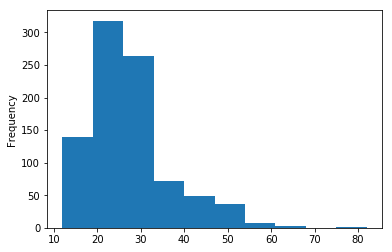

In [236]:
# 劃出每一長度區間次數的長條分布圖(如長度界在10~20之間的有出現約150次)(hint: df[col].plot('hist'))
#!=============your works starts===============!#
name_length.plot('hist')
#!==============your works ends================!#

plt.show()

## Fare - PCA, smooth noisy data, feature generation

In [237]:
type(df.columns)

pandas.core.indexes.base.Index

In [238]:
# 請找出dtype是np.int64或np.float64且名稱不以'_cat'結尾的欄位。
#=============your works starts===============#
number_cols = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and not col.endswith('_cat')] 
#==============your works ends================#


print(number_cols)
# ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'avg_age', 'median_age', 'random_age', 'avg_age_l1', 'avg_age_l2', 'name_length']

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'avg_age', 'median_age', 'random_age', 'avg_age_l1', 'avg_age_l2', 'embarked_mapping', 'name_length']


請參照[這個連結](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py)，劃出以下這張PCA圖

![PCA_chart](./imgs/PCA.png)

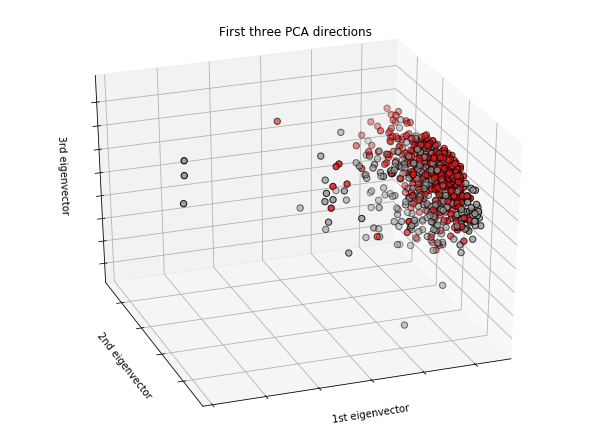

In [239]:
X = df[['Pclass', 'Parch', 'SibSp', 'Fare', 'avg_age', 'name_length']].values
Y = np.array(df['Survived'])

#!=============your works starts===============!#

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


#!==============your works ends================!#

plt.show()

In [240]:
# 請找出標準差最大的欄位['Pclass', 'Parch', 'SibSp', 'Fare', 'avg_age', 'name_length']
#!=============your works starts===============!#

df[['Pclass', 'Parch', 'SibSp', 'Fare', 'avg_age', 'name_length']].describe()

#!==============your works ends================!#


,Pclass,Parch,SibSp,Fare,avg_age,name_length
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.381594,0.523008,32.204208,29.699118,26.965208
std,0.836071,0.806057,1.102743,49.693429,13.002015,9.281607
min,1.000000,0.000000,0.000000,0.000000,0.420000,12.000000
25%,2.000000,0.000000,0.000000,7.910400,22.000000,20.000000
50%,3.000000,0.000000,0.000000,14.454200,29.699118,25.000000
75%,3.000000,0.000000,1.000000,31.000000,35.000000,30.000000
max,3.000000,6.000000,8.000000,512.329200,80.000000,82.000000


In [241]:
# 請找出Fare的平均值(mean)，並填入df['Fare']中
#=============your works starts===============#
avg_fare = df['Fare'].mean()
# df[pd.isnull(df['Fare'])] = avg_fare
#==============your works ends================#
# df['Fare'].fillna(avg_fare)

# print(avg_fare)
print("avg_fare", avg_fare)
# 32.204207968574636
print("number of null of Fare:", len(df[pd.isnull(df['Fare'])]))
# number of null of Fare: 0

avg_fare 32.204207968574636
number of null of Fare: 0


In [242]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [243]:
# 找出Fare==0的row，補上Fare=1
#!=============your works starts===============!#
df[df['Fare']==0]=1

#!==============your works ends================!#

print(df['Fare'].values[-6:-1])
print("number of Fare equals zero:", len(df[df['Fare']==0]))
# number of Fare equals zero: 0

[29.125 13.    30.    23.45  30.   ]
number of Fare equals zero: 0


In [244]:
# 請算出Fare以10為底的log值
#=============your works starts===============#
fare_log10 = np.log10(df['Fare'].values)
#==============your works ends================#

print(df['Fare'].values[:5])
print(fare_log10[:5])
# [0.86033801 1.8529878  0.89899927 1.72509452 0.90579588]

[ 7.25   71.2833  7.925  53.1     8.05  ]
[0.86033801 1.8529878  0.89899927 1.72509452 0.90579588]


In [245]:
df['fare_log10'] = fare_log10
df[['Fare', 'fare_log10']].head()

,Fare,fare_log10
0,7.2500,0.860338
1,71.2833,1.852988
2,7.9250,0.898999
3,53.1000,1.725095
4,8.0500,0.905796


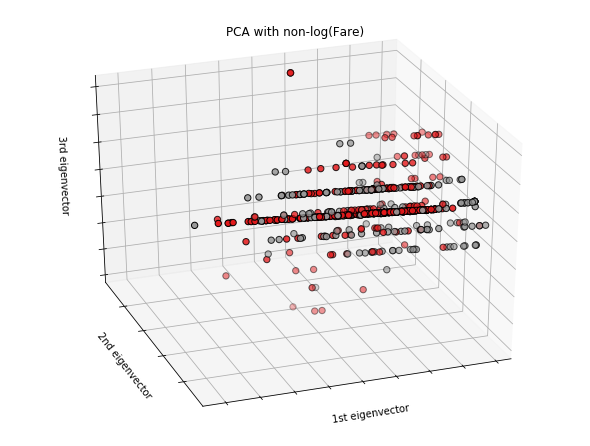

In [246]:
X = np.matrix(df[['Parch', 'SibSp', 'avg_age', 'fare_log10']])
Y = np.array(df['Survived'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# 類別型變數onehot encode

In [247]:
enc = preprocessing.OneHotEncoder()
# 請使用enc.fit_transform兩個步驟，onehot encode title_cat
#=============your works starts===============#
title_cat_onehot = enc.fit_transform(df['title_cat'].values.reshape(-1,1)).toarray()
#==============your works ends================#


print(title_cat_onehot[:3])
# [[1. 0. 0. 0. 0.]
#  [0. 0. 1. 0. 0.]
#  [0. 1. 0. 0. 0.]]

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


c:\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [248]:
enc = preprocessing.OneHotEncoder()
# 請使用enc.fit_transform兩個步驟，onehot encode embarked_cat
#=============your works starts===============#
embarked_cat_onehot = enc.fit_transform(df['embarked_mapping'].values.reshape(-1,1)).toarray()
#==============your works ends================#

embarked_cat_onehot[:3]
# array([[0., 0., 1., 0.],
#        [0., 1., 0., 0.],
#        [0., 0., 1., 0.]])

c:\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [249]:
df.columns
df['title_cat'].values.reshape(-1,1)

array([[1],
       [3],
       [2],
       [3],
       [1],
       [1],
       [1],
       [4],
       [3],
       [3],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [4],
       [1],
       [3],
       [3],
       [1],
       [1],
       [2],
       [1],
       [2],
       [3],
       [1],
       [1],
       [2],
       [1],
       [5],
       [3],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [3],
       [3],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [3],
       [4],
       [1],
       [3],
       [3],
       [1],
       [1],
       [2],
       [1],
       [2],
       [4],
       [1],
       [2],
       [1],
       [4],
       [1],
       [4],
       [3],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [4],
       [2],
       [1],
       [1],
       [2],
    

# PolynomialFeatures

In [250]:
poly = preprocessing.PolynomialFeatures(degree=2)
# 請利用poly.fit_transform製造出fare_log10的0次項、1次項、2次項，並把0次項拿掉
#=============your works starts===============#
fare_log10_poly =poly.fit_transform(df['fare_log10'].values.reshape(-1,1))[:,1:]
#==============your works ends================#

print(fare_log10_poly[:2])
# [[1.         0.86033801 0.74018149]
#  [1.         1.8529878  3.43356378]]

[[0.86033801 0.74018149]
 [1.8529878  3.43356378]]


In [251]:
print(type(df['fare_log10'].values[:5]))
df['fare_log10'].values[:5]

<class 'numpy.ndarray'>


array([0.86033801, 1.8529878 , 0.89899927, 1.72509452, 0.90579588])

In [259]:
# 請利用poly.fit_transform製造出'fare_log10', 'random_age'的二項次及其一次交成項
#=============your works starts===============#
age_fare_ploy = poly.fit_transform(df[['fare_log10','random_age']].values)
#==============your works ends================#

print(age_fare_ploy[:2])
# [[8.60338007e-01 8.31383556e-04 7.40181486e-01 7.15270871e-04 6.91198616e-07]
#  [1.85298780e+00 1.43602614e-03 3.43356378e+00 2.66093892e-03 2.06217108e-06]]

TypeError: list indices must be integers or slices, not list

In [253]:
# column=['fare_log10','random_age']
# df = [column]
# list(df[:7])

[['fare_log10', 'random_age']]

## Preprocessing Conclude

In [258]:
df.columns

AttributeError: 'list' object has no attribute 'columns'

In [256]:
X = df[['SibSp', 'Parch', 'avg_age_l2', 'sex_cat', 'name_length', 'fare_log10']].values
X = np.concatenate([X, title_cat_onehot, embarked_cat_onehot, age_fare_ploy], axis=1)
Y = df[['Survived']].values

print(X.shape)
print(Y.shape)

TypeError: list indices must be integers or slices, not list

In [257]:
from sklearn import linear_model
from  sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1212)

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
predict_prob = reg.predict(X_test)

Y_predict = predict_prob > 0.5 
Y_test = Y_test == 1
acc = np.sum(Y_predict == Y_test)/ len(Y_test)
print("Accuracy:", acc)


Accuracy: 0.6367713004484304
